# Assignment 4 & 5

In [2]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib as mlt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [17]:
df = pd.read_csv('/Users/lestersoers/Downloads/HR_employee.csv') #Sourcing dataframe from Kaggle (HR-employee )

In [18]:
#showing the first 20 rows
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [93]:
#showing the frequency of all the included variables
df.count() 

Unnamed: 0                 789
Country                    789
Sector_name                789
Pollutant_name             789
Emissions                  789
Unit                       789
Year                       789
Total Emissions EU         789
Total Emissions Country    789
Density (km2)              789
Population                 789
Total pop EU               789
GDP                        789
dtype: int64

In [5]:
#Selecting inputs for my model
df = df[['HourlyRate', 'StandardHours', 'Age', 'JobLevel', 'YearsAtCompany', 'TotalWorkingYears', 'MonthlyIncome']] #subsetting the positions I want to investigate further into.
df.head(10) #table containing values

,HourlyRate,StandardHours,Age,JobLevel,YearsAtCompany,TotalWorkingYears,MonthlyIncome
0,94,80,41,2,6,8,5993
1,61,80,49,2,10,10,5130
2,92,80,37,1,0,7,2090
3,56,80,33,1,8,8,2909
4,40,80,27,1,2,6,3468
5,79,80,32,1,7,8,3068
6,81,80,59,1,1,12,2670
7,67,80,30,1,1,1,2693
8,44,80,38,3,9,10,9526
9,94,80,36,2,7,17,5237


In [6]:
#Chosing Random Forest because i am working with many variables. Random Forest sets up trees with the variables,
#RF is a classification algorithm that builds decision trees. when building trees it creates an uncorrelated forest whose prediction by committee than that of any tree on its own.
#RF based on votes the tree gets to its destination, as in the actual prediction value
#The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree
X = df[['HourlyRate', 'StandardHours', 'Age', 'JobLevel', 'YearsAtCompany', 'TotalWorkingYears', 'MonthlyIncome']]
y = df['JobLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
#to see if the shape is 2D as needed.
print(X_train.shape)

(1029, 7)


In [9]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import datasets
#RF is a random algorithm, so to get the same results we need to use random_state, defined with 1 to get close to the same results each time
#N_estimators = 100 means the RF creates 100 decision making trees to gets to the desired destination AKA the value prediction
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf = rf.fit(X_train, y_train)

In [10]:
##Test predicted a rf-score of 1.0. 
rf.score(X_test,y_test)

1.0

The rf score resembles the mean accuracy of the RF-model in regard to the given test and its data. In this case, the model is very accurate.

In [13]:
# Make predictions for the test set
y_pred = rf.predict(X_test)

In [14]:
#Prints a report that shows the predictions thus far based on the Y_test. We are not yet talking about the actual test.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       165
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        19

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



The accuracy score of 1.0, which resembles 100%, tells me how many times the model predicted correct overall. 

The precision result of 1.0, which resembles 100%, means that all the positive samples are classified as positive samples in the dataframe and none of the positive samples are classified incorrectly.

he recall is the measure of our model correctly identifying True Positives

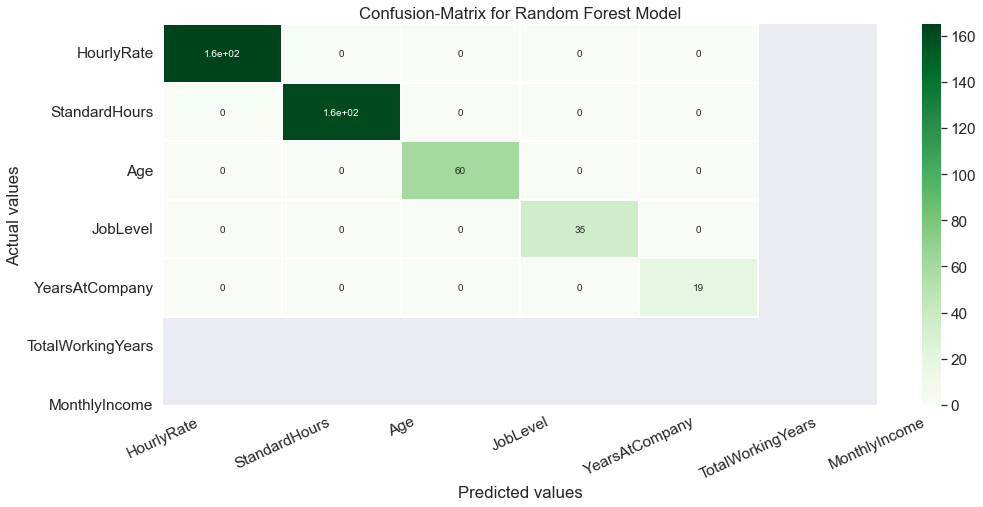

In [16]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['HourlyRate', 'StandardHours', 'Age', 'JobLevel', 'YearsAtCompany', 'TotalWorkingYears', 'MonthlyIncome']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion-Matrix for Random Forest Model')
plt.show()

The confusion-matrix shows between what variables the Random Forest model had confusion towards to, to decide which decision is the correct one. Most of the squares in the matrix have a value of 0, which is perfectly fine and desired. The more complex matters for the algorithm were the variable 'StandardHours', 'Age', and 'JobLevel'. 